In [162]:
# Importing required Packages
import pandas as pd
import numpy as np
from scipy import stats


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Load training data

In [163]:
training_data = pd.read_csv("Gmat.csv")

In [164]:
training_data

,GMAT Score,Work Exp,Admission
0,750,0,Yes
1,720,1,Yes
2,710,2,No
3,690,0,No
4,670,4,Yes
5,650,6,Yes
6,600,1,No


## Plot a scatter plot of GMAT Score & Work Exp

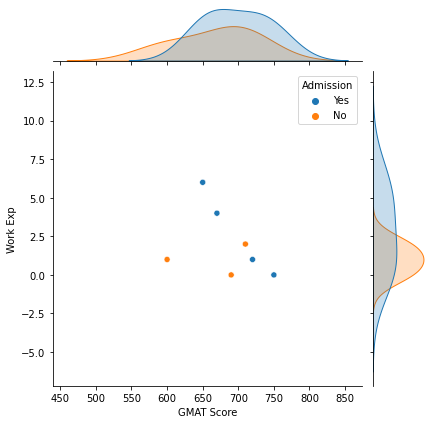

In [166]:
sns.jointplot(data=training_data,x="GMAT Score",y="Work Exp",hue='Admission')

# Load Query Data

In [179]:
query_data = pd.read_csv("query_point.csv")

In [180]:
query_data

,GMAT Score,Work Exp
0,716,3


## Provide k value

In [199]:
k = 3

## Convert dataframe into numpy array

In [181]:
## Query data
query_data = np.array(query_data)
query_data

array([[716,   3]])

In [182]:
### Features
feature_data = np.array(df.iloc[: , :-1])
feature_data

array([[750,   0],
       [720,   1],
       [710,   2],
       [690,   0],
       [670,   4],
       [650,   6],
       [600,   1]])

In [187]:
target_data = np.array(df.iloc[: , -1:])
target_data

array([['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No']], dtype=object)

# KNN Algorithm

## Step 1 : Calculate the distance between query point and each row of training data. 

In [194]:
distances = np.sqrt(np.sum(np.square(query_data - feature_data),axis=1))

In [195]:
distances

array([ 34.13209633,   4.47213595,   6.08276253,  26.17250466,
        46.01086828,  66.06814664, 116.0172401 ])

## Step 2 : Sort the calculated distances in ascending order based on distance values
`

In [196]:
np.sort(distances)

array([  4.47213595,   6.08276253,  26.17250466,  34.13209633,
        46.01086828,  66.06814664, 116.0172401 ])

In [198]:
sort_index = np.argsort(distances)
sort_index

array([1, 2, 3, 0, 4, 5, 6])

## Step 3 : Get top k rows from the sorted array


In [201]:
top_k = sort_index[0:k]
top_k

array([1, 2, 3])

## Step 4 : Get the most frequent class of these rows


In [204]:
training_data

,GMAT Score,Work Exp,Admission
0,750,0,Yes
1,720,1,Yes
2,710,2,No
3,690,0,No
4,670,4,Yes
5,650,6,Yes
6,600,1,No


In [205]:
nn_classes = target_data[top_k]
nn_classes

array([['Yes'],
       ['No'],
       ['No']], dtype=object)

## Step 5 : Predicted Class : Get the most frequent class


In [212]:
pred = stats.mode(nn_classes)[0][0][0]
pred

'No'

# Full Function

In [219]:
def my_knn(training_data,query_data,k=3):
    
    ### Data
    query_data = np.array(query_data)
    feature_data = np.array(training_data.iloc[: , :-1])
    target_data = np.array(training_data.iloc[: , -1:])
    
    ##Algo
    distances = np.sqrt(np.sum(np.square(query_data - feature_data),axis=1)) ##Step1
    sort_index = np.argsort(distances) ##Step2
    top_k = sort_index[0:k]    ##Step3
    nn_classes = target_data[top_k] ##Step4
    pred = stats.mode(nn_classes)[0][0][0] ## Step5
    
    return pred
 

In [221]:
my_knn(training_data,query_data,k=5)

'Yes'